In [2]:
#Import tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sexmachine.detector as gender
import csv

In [3]:
d = gender.Detector()

In [5]:
#Read data and import full file.
df = pd.read_csv('/Users/windyseng/Desktop/salaries/DCASFY15_17.csv', header=0, delimiter=',', encoding="utf-8-sig")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5864 entries, 0 to 5863
Data columns (total 16 columns):
ID                       5864 non-null int64
FiscalYear               5864 non-null int64
AgencyName               5864 non-null object
FirstName                5864 non-null object
MidInit                  3124 non-null object
AgencyStartDate          5864 non-null object
WorkLocationBorough      5864 non-null object
TitleDescription         5864 non-null object
LeaveStatusasofJune30    5864 non-null object
BaseSalary               5864 non-null int64
PayBasis                 5864 non-null object
RegularHours             5864 non-null int64
RegularGrossPaid         5864 non-null int64
OTHours                  5864 non-null int64
TotalOTPaid              5864 non-null int64
TotalOtherPay            5864 non-null int64
dtypes: int64(8), object(8)
memory usage: 733.1+ KB


In [6]:
#Replaced columns, spaces, and underscores in column titles if needed.
df.columns = df.columns.str.replace('\s+', '')
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('_', '')

In [7]:
#Review fields in dataset
df.head()

,ID,FiscalYear,AgencyName,FirstName,MidInit,AgencyStartDate,WorkLocationBorough,TitleDescription,LeaveStatusasofJune30,BaseSalary,PayBasis,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay
0,1,2017,DEPT OF CITYWIDE ADMIN SVCS,YVONNE,D,6/23/96,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,ON LEAVE,51128,per Annum,997,29679,0,0,2353
1,2,2017,DEPT OF CITYWIDE ADMIN SVCS,CAROL,A,6/23/96,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,CEASED,51915,per Annum,615,20197,0,0,1519
2,3,2017,DEPT OF CITYWIDE ADMIN SVCS,JIREH,NaN,6/27/11,MANHATTAN,CLERICAL ASSOCIATE,ACTIVE,38869,per Annum,1825,39985,0,0,4778
3,4,2017,DEPT OF CITYWIDE ADMIN SVCS,KAREN,NaN,10/27/14,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,CEASED,61031,per Annum,780,29253,4,142,0
4,5,2017,DEPT OF CITYWIDE ADMIN SVCS,TARIK,NaN,5/12/02,MANHATTAN,n,ACTIVE,73714,per Annum,1825,75841,0,0,13134


In [8]:
#Creates column in dataframe "Gender"
df['Gender'] = df['FirstName']
d = gender.Detector(case_sensitive=False)

In [9]:
df["SplitName"] = df['FirstName']
df['SplitName'] = df['SplitName'].str.split()

In [10]:
for i in range(0, 5864): 
	df['FirstName'][i] = df['SplitName'][i].pop(0)
	print(i)
	
for i in range(0, 5864): 
	df['Gender'][i] = d.get_gender(df['FirstName'][i])
	print(i)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080


3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743


5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397


/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


5859
5860
5861
5862
5863
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
2

1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057


3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701


5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347


In [11]:
pandy = float(sum(df["Gender"] == "andy")) / sum(df["Gender"].notnull())
pmale = float(sum(df["Gender"] == "male")) / sum(df["Gender"].notnull())
pfemale = float(sum(df["Gender"] == "female")) / sum(df["Gender"].notnull())
pmmale = float(sum(df["Gender"] == "mostly_male")) / sum(df["Gender"].notnull())
pmfemale = float(sum(df["Gender"] == "mostly_female")) / sum(df["Gender"].notnull())

In [12]:
print(pandy) #0.15
print(pmale) #0.45
print(pfemale) #0.34
print(pmmale) #0.02
print(pmfemale) #0.04
print(pandy + pmale + pfemale + pmmale + pmfemale) #1.00

0.155184174625
0.455320600273
0.335607094134
0.018758526603
0.0351296043656
1.0


In [13]:
#Review gender assigned based on first name.
df.head()

,ID,FiscalYear,AgencyName,FirstName,MidInit,AgencyStartDate,WorkLocationBorough,TitleDescription,LeaveStatusasofJune30,BaseSalary,PayBasis,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay,Gender,SplitName
0,1,2017,DEPT OF CITYWIDE ADMIN SVCS,YVONNE,D,6/23/96,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,ON LEAVE,51128,per Annum,997,29679,0,0,2353,female,[]
1,2,2017,DEPT OF CITYWIDE ADMIN SVCS,CAROL,A,6/23/96,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,CEASED,51915,per Annum,615,20197,0,0,1519,mostly_female,[]
2,3,2017,DEPT OF CITYWIDE ADMIN SVCS,JIREH,NaN,6/27/11,MANHATTAN,CLERICAL ASSOCIATE,ACTIVE,38869,per Annum,1825,39985,0,0,4778,andy,[]
3,4,2017,DEPT OF CITYWIDE ADMIN SVCS,KAREN,NaN,10/27/14,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,CEASED,61031,per Annum,780,29253,4,142,0,female,[]
4,5,2017,DEPT OF CITYWIDE ADMIN SVCS,TARIK,NaN,5/12/02,MANHATTAN,n,ACTIVE,73714,per Annum,1825,75841,0,0,13134,male,[]


In [14]:
df_copy = df #just in case

In [15]:
#Removed columns no longer needed--First name, middle initial, and split name which was used previously for first and last
df = df.drop(['FirstName','MidInit','SplitName'], axis=1)

In [16]:
#Review columns were dropped properly
df.head()

,ID,FiscalYear,AgencyName,AgencyStartDate,WorkLocationBorough,TitleDescription,LeaveStatusasofJune30,BaseSalary,PayBasis,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay,Gender
0,1,2017,DEPT OF CITYWIDE ADMIN SVCS,6/23/96,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,ON LEAVE,51128,per Annum,997,29679,0,0,2353,female
1,2,2017,DEPT OF CITYWIDE ADMIN SVCS,6/23/96,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,CEASED,51915,per Annum,615,20197,0,0,1519,mostly_female
2,3,2017,DEPT OF CITYWIDE ADMIN SVCS,6/27/11,MANHATTAN,CLERICAL ASSOCIATE,ACTIVE,38869,per Annum,1825,39985,0,0,4778,andy
3,4,2017,DEPT OF CITYWIDE ADMIN SVCS,10/27/14,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,CEASED,61031,per Annum,780,29253,4,142,0,female
4,5,2017,DEPT OF CITYWIDE ADMIN SVCS,5/12/02,MANHATTAN,n,ACTIVE,73714,per Annum,1825,75841,0,0,13134,male


In [17]:
#Copy dataframe to .csv file
df.to_csv('DCAS_Gender.csv', index=False, sep=',') #save df that has gender instead of name

In [18]:
df.describe()

,ID,FiscalYear,BaseSalary,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay
count,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000
mean,2932.500000,2016.019441,59877.296385,1607.730559,50195.516371,161.236357,4923.957708,1560.082708
std,1692.935321,0.817240,31540.577445,629.109624,34185.635476,276.189775,8445.572700,2063.912104
min,1.000000,2015.000000,25997.000000,-80.000000,0.000000,0.000000,-66.000000,-123.000000
25%,1466.750000,2015.000000,34364.000000,1605.000000,32906.250000,0.000000,0.000000,8.000000
50%,2932.500000,2016.000000,50201.500000,1825.000000,39326.500000,14.500000,533.000000,1000.000000
75%,4398.250000,2017.000000,75410.500000,2086.000000,66675.000000,198.000000,6251.000000,2370.000000
max,5864.000000,2017.000000,226366.000000,2171.000000,232934.000000,1850.000000,55437.000000,18628.000000


In [19]:
pandy = float(sum(df["Gender"] == "andy")) / sum(df["Gender"].notnull())
pmale = float(sum(df["Gender"] == "male")) / sum(df["Gender"].notnull())
pfemale = float(sum(df["Gender"] == "female")) / sum(df["Gender"].notnull())
pmmale = float(sum(df["Gender"] == "mostly_male")) / sum(df["Gender"].notnull())
pmfemale = float(sum(df["Gender"] == "mostly_female")) / sum(df["Gender"].notnull())

In [20]:
print(pandy) #0.16
print(pmale) #0.46
print(pfemale) #0.34
print(pmmale) #0.02
print(pmfemale) #0.04
print(pandy + pmale + pfemale + pmmale + pmfemale) #1.00

0.155184174625
0.455320600273
0.335607094134
0.018758526603
0.0351296043656
1.0


In [21]:
df_copy = df #just in case

In [22]:
#Changing mostly male or female to male or female
df = df[df.Gender != 'andy']
df['Gender'] = df['Gender'].map({'male': 'male', 'female': 'female', 'mostly_male': 'male','mostly_female': 'female'})

/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
pandy = float(sum(df["Gender"] == "andy")) / sum(df["Gender"].notnull())
pmale = float(sum(df["Gender"] == "male")) / sum(df["Gender"].notnull())
pfemale = float(sum(df["Gender"] == "female")) / sum(df["Gender"].notnull())
pmmale = float(sum(df["Gender"] == "mostly_male")) / sum(df["Gender"].notnull())
pmfemale = float(sum(df["Gender"] == "mostly_female")) / sum(df["Gender"].notnull())

In [24]:
#Review that replacements completed properly
df.head()

,ID,FiscalYear,AgencyName,AgencyStartDate,WorkLocationBorough,TitleDescription,LeaveStatusasofJune30,BaseSalary,PayBasis,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay,Gender
0,1,2017,DEPT OF CITYWIDE ADMIN SVCS,6/23/96,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,ON LEAVE,51128,per Annum,997,29679,0,0,2353,female
1,2,2017,DEPT OF CITYWIDE ADMIN SVCS,6/23/96,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,CEASED,51915,per Annum,615,20197,0,0,1519,female
3,4,2017,DEPT OF CITYWIDE ADMIN SVCS,10/27/14,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE,CEASED,61031,per Annum,780,29253,4,142,0,female
4,5,2017,DEPT OF CITYWIDE ADMIN SVCS,5/12/02,MANHATTAN,n,ACTIVE,73714,per Annum,1825,75841,0,0,13134,male
7,8,2017,DEPT OF CITYWIDE ADMIN SVCS,5/15/17,BRONX,CITY SECURITY AIDE ...,ACTIVE,37500,per Annum,274,4315,0,0,0,male


In [25]:
#Grouping by gender and salary
df.groupby(['Gender'])[["BaseSalary"]].mean()

,BaseSalary
Gender,
female,61140.911684
male,59277.692806


In [26]:
#Grouping by gender and salary
df.groupby(['Gender'])[["BaseSalary"]].median()

,BaseSalary
Gender,
female,52186.0
male,48248.5


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4954 entries, 0 to 5863
Data columns (total 15 columns):
ID                       4954 non-null int64
FiscalYear               4954 non-null int64
AgencyName               4954 non-null object
AgencyStartDate          4954 non-null object
WorkLocationBorough      4954 non-null object
TitleDescription         4954 non-null object
LeaveStatusasofJune30    4954 non-null object
BaseSalary               4954 non-null int64
PayBasis                 4954 non-null object
RegularHours             4954 non-null int64
RegularGrossPaid         4954 non-null int64
OTHours                  4954 non-null int64
TotalOTPaid              4954 non-null int64
TotalOtherPay            4954 non-null int64
Gender                   4954 non-null object
dtypes: int64(8), object(7)
memory usage: 619.2+ KB


In [30]:
pd.crosstab(df.TitleDescription,df.Gender,margins=True)

Gender,female,male,All
TitleDescription,,,
*ADM DIR FLEET MAINT-MGRL ASGMNT,0,1,1
*CUSTODIAL ASSISTANT,5,16,21
*WATCHPERSON,0,6,6
ACCOUNTANT,6,17,23
ADM MANAGER-NON-MGRL,32,12,44
ADM MANAGER-NON-MGRL,56,18,74
ADM MANAGER-NON-MGRL,29,13,42
ADMIN CONSTRUCTION PROJECT MANAGER,2,6,8
ADMIN INSPECTOR,0,4,4


In [28]:
pd.crosstab(df.Gender,df.PayBasis,margins=True)

PayBasis,per Annum,All
Gender,,
female,2174,2174
male,2780,2780
All,4954,4954


In [35]:
df.groupby(['TitleDescription'])[['BaseSalary']].median()

,BaseSalary
TitleDescription,
*ADM DIR FLEET MAINT-MGRL ASGMNT,118034.0
*CUSTODIAL ASSISTANT,32904.0
*WATCHPERSON,43428.5
ACCOUNTANT,65000.0
ADM MANAGER-NON-MGRL,62445.0
ADM MANAGER-NON-MGRL,69934.5
ADM MANAGER-NON-MGRL,66086.0
ADMIN CONSTRUCTION PROJECT MANAGER,90286.0
ADMIN INSPECTOR,102145.5


In [36]:
df.TitleDescription = df.TitleDescription.str.replace('*', '')

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [37]:
#Remove "n" titles from Title Description aka Civil Service Title
df=df[df.TitleDescription != 'n']

In [38]:
df.groupby(['TitleDescription'])[['BaseSalary']].mean()

,BaseSalary
TitleDescription,
ACCOUNTANT,63556.565217
ADM DIR FLEET MAINT-MGRL ASGMNT,118034.000000
ADM MANAGER-NON-MGRL,64230.840909
ADM MANAGER-NON-MGRL,73507.621622
ADM MANAGER-NON-MGRL,67403.738095
ADMIN CONSTRUCTION PROJECT MANAGER,88796.250000
ADMIN INSPECTOR,102383.500000
ADMIN TESTS & MEAS SPEC,108835.950000
ADMINISTRATIVE ACCOUNTANT,122603.818182


In [71]:
print(df.TitleDescription)
out = df.astype(str).groupby('TitleDescription').agg(','.join)
out = out.reset_index()
print(out)

7       city security aide                            ...
9       senior salvage appraiser                      ...
10      custodian                                     ...
11      city custodial assistant                      ...
12      construction project manager                  ...
13      city custodial assistant                      ...
14      administrative procurement analyst            ...
16              clerical associate                       
18      city custodial assistant                      ...
19      city custodial assistant                      ...
20      community coordinator                         ...
21              clerical associate                       
22                     principal administrative associate
24      supervising special officer                   ...
25      tests and measurement specialist              ...
30                     principal administrative associate
34      chauffeur-attendant                           ...
35      assist

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4203 entries, 7 to 5862
Data columns (total 16 columns):
ID                       4203 non-null int64
FiscalYear               4203 non-null int64
AgencyName               4203 non-null object
AgencyStartDate          4203 non-null object
WorkLocationBorough      4203 non-null object
TitleDescription         4203 non-null object
LeaveStatusasofJune30    4203 non-null object
BaseSalary               4203 non-null int64
PayBasis                 4203 non-null object
RegularHours             4203 non-null int64
RegularGrossPaid         4203 non-null int64
OTHours                  4203 non-null int64
TotalOTPaid              4203 non-null int64
TotalOtherPay            4203 non-null int64
Gender                   4203 non-null object
TitleDescription         4203 non-null object
dtypes: int64(8), object(8)
memory usage: 718.2+ KB


In [69]:
#Number of staff in each title 
df.TitleDescription.value_counts()

city custodial assistant                                        653
custodian                                                       554
custodial assistant                                             350
administrative staff analyst                                    288
principal administrative associate                              160
clerical associate                                              128
community associate                                             101
chauffeur-attendant                                              99
associate staff analyst                                          96
computer specialist                                              78
principal administrative associate                               73
adm manager-non-mgrl                                             70
staff analyst                                                    70
community assistant                                              70
administrative procurement analyst              

In [39]:
df['TitleDescription'] = df['TitleDescription'].map(lambda x: x.upper())

res = df.groupby('TitleDescription').sum()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#Group by Title Description and Average Base Salary.  Seems to be an issue with groupings of similar title descriptions, ADM MANAGER-NON-MGRL is showing up 3 times. PRINCIPAL ADMINISTRATIVE ASSOCIATE is also showing twice.

In [40]:
df.groupby(['TitleDescription'])[['BaseSalary']].mean()

,BaseSalary
TitleDescription,
ACCOUNTANT,63556.565217
ADM DIR FLEET MAINT-MGRL ASGMNT,118034.000000
ADM MANAGER-NON-MGRL,64230.840909
ADM MANAGER-NON-MGRL,73507.621622
ADM MANAGER-NON-MGRL,67403.738095
ADMIN CONSTRUCTION PROJECT MANAGER,88796.250000
ADMIN INSPECTOR,102383.500000
ADMIN TESTS & MEAS SPEC,108835.950000
ADMINISTRATIVE ACCOUNTANT,122603.818182


In [77]:
df.groupby(['TitleDescription','Gender'])[['BaseSalary']].median()

BaseSalary
TitleDescription                                   Gender            
accountant                                     ... female     65668.0
                                                   male       64864.0
adm manager-non-mgrl                               female     61943.5
                                                   male       65986.0
adm manager-non-mgrl                               female     70031.0
                                                   male       72102.5
adm manager-non-mgrl                               female     64070.0
                                                   male       73736.0
admin construction project manager             ... female     76125.0
                                                   male       91639.0
admin inspector                                ... male      102145.5
admin tests & meas spec                        ... female     97308.0
                                                   male      105246.5
administrative accountant                      ... male      121500.0
administrative architect                       ... female    121164.5
                                                   male      121078.0
administrative business promotion coordinator  ... female    100000.0
                                                   male      110156.0
administrative city planner                    ... male      135798.5
administrative construction project manager    ... male      117155.5
administrative engineer                        ... female    135000.0
                                                   male      120262.0
administrative graphic artist                  ... female    102000.0
                                                   male       84241.0
administrative inspector                       ... male      112173.0
administrative investigator                    ... female     74909.5
                                                   male       75748.0
administrative management auditor              ... male      103752.0
administrative manager                         ... female    103673.0
                                                   male       96475.0
...                                                               ...
quality assurance specialist                   ... female     46913.0
                                                   male       50749.0
radio and television operator                  ... male       49207.0
real property assistant                        ... male       42000.0
real property manager                          ... male       53781.5
secretary                                      ... female     44822.0
secretary of comm                              ... female     60202.0
secretary to the deputy commissioner           ... female     95000.0
senior estimator                               ... male       90000.0
senior salvage appraiser                       ... male       62210.0
special officer                                ... female     46737.0
                                                   male       46737.0
staff analyst                                  ... female     57590.0
                                                   male       64651.0
staff analyst trainee                          ... female     42373.0
                                                   male       39238.0
stock worker                                   ... female     31536.0
                                                   male       34165.0
strategic initiative specialist                ... female     80000.0
                                                   male       87500.0
supervising special officer                    ... female     63863.0
                                                   male       66155.0
supervisor of mechanics                        ... male      102263.0
supervisor of motor transport                  ... male       58745.0
supervisor of radio and television operators   ... male       74963.5

In [81]:
df.groupby(['FiscalYear','Gender']).agg({'TitleDescription':[min, max, 'nunique']})

TitleDescription  \
                                                                 min   
FiscalYear Gender                                                      
2015       female  accountant                                    ...   
           male    accountant                                    ...   
2016       female  accountant                                    ...   
           male    accountant                                    ...   
2017       female  accountant                                    ...   
           male    accountant                                    ...   

                                                                              
                                                                 max nunique  
FiscalYear Gender                                                             
2015       female  tests and measurement specialist              ...      66  
           male    watchperson                                   ...      88  
2016       female  tests and measurement specialist              ...      75  
           male    watchperson                                   ...      92  
2017       female  tests and measurement specialist              ...      77  
           male    watchperson                                   ...      93

In [102]:
#Duplicates in Title Description is the same in Pivot Tables and Groupby
t = df.pivot_table(index='TitleDescription', columns='Gender', values='BaseSalary', aggfunc='count')
t.head()

Gender,female,male
TitleDescription,,
accountant,5.0,15.0
adm manager-non-mgrl,28.0,10.0
adm manager-non-mgrl,54.0,16.0
adm manager-non-mgrl,23.0,11.0
admin construction project manager,2.0,6.0


In [109]:
#Find where the title is the same for adm manager-non-mgrl 
df['TitleDescription'].str.contains('adm manager-non-mgrl').value_counts()

False    4061
True      142
Name: TitleDescription, dtype: int64

In [111]:
#Replaces all strings that contain Adm manager-non-mgrl with same title.  This combines the duplicates in groupby.
df.loc[df['TitleDescription'].str.contains('adm manager-non-mgrl'), 'TitleDescription'] = 'adm manager-non-mgrl'

In [112]:
df.groupby(['TitleDescription','Gender']).agg({'BaseSalary':[min, max, sum]})

BaseSalary          \
                                                                 min     max   
TitleDescription                                   Gender                      
accountant                                     ... female      52193   70000   
                                                   male        45000   88919   
adm manager-non-mgrl                               female      51765  126920   
                                                   male        50234   95864   
admin construction project manager             ... female      75000   77250   
                                                   male        87740   99906   
admin inspector                                ... male        85000  120243   
admin tests & meas spec                        ... female      88699  149350   
                                                   male        99347  111494   
administrative accountant                      ... male        93243  134461   
administrative architect                       ... female     113680  132821   
                                                   male       118125  124710   
administrative business promotion coordinator  ... female     100000  100000   
                                                   male       107469  113461   
administrative city planner                    ... male        80000  165583   
administrative construction project manager    ... male        80000  156303   
administrative engineer                        ... female     120331  139050   
                                                   male        87186  160146   
administrative graphic artist                  ... female     102000  102000   
                                                   male        82186   86768   
administrative inspector                       ... male       104344  118426   
administrative investigator                    ... female      63583   81370   
                                                   male        71748   77712   
administrative management auditor              ... male       101221  111995   
administrative manager                         ... female      75870  161307   
                                                   male        90000  120355   
administrative procurement analyst             ... female      56667  120510   
                                                   male        56667  138040   
administrative project manager                 ... female      98158  115927   
                                                   male        79000  163517   
...                                                              ...     ...   
quality assurance specialist                   ... female      46913   46913   
                                                   male        46913   68825   
radio and television operator                  ... male        49000   50470   
real property assistant                        ... male        42000   42000   
real property manager                          ... male        50426   57273   
secretary                                      ... female      33310   56617   
secretary of comm                              ... female      58734   62008   
secretary to the deputy commissioner           ... female      86798   97850   
senior estimator                               ... male        82824   92700   
senior salvage appraiser                       ... male        61291   70142   
special officer                                ... female      34510   46737   
                                                   male        34510   46791   
staff analyst                                  ... female      45358   69653   
                                                   male        50079   75259   
staff analyst trainee                          ... female      39237   52000   
                                                   male        38094   42373   
stock worker                                   ... female 

In [115]:
#Find where the title is the same for adm manager-non-mgrl 
df['TitleDescription'].str.contains('principal administrative associate').value_counts()

False    3970
True      233
Name: TitleDescription, dtype: int64

In [117]:
#Replaces all strings that contain 'principal administrative associate' with same title.  This combines the duplicates in groupby.
df.loc[df['TitleDescription'].str.contains('principal administrative associate'), 'TitleDescription'] = 'principal administrative associate'

In [162]:
t.plot(kind='line', axis=False)
plt.show()

AttributeError: Unknown property axis

In [176]:
df_pivot = pd.pivot_table(df, index=['TitleDescription'], columns = ['Gender'],values=['BaseSalary'], fill_value=0)

In [182]:
df_pivot

BaseSalary  \
Gender                                                     female   
TitleDescription                                                    
accountant                                     ...   62514.000000   
adm manager-non-mgrl                                 69867.571429   
admin construction project manager             ...   76125.000000   
admin inspector                                ...       0.000000   
admin tests & meas spec                        ...  109561.909091   
administrative accountant                      ...       0.000000   
administrative architect                       ...  122130.333333   
administrative business promotion coordinator  ...  100000.000000   
administrative city planner                    ...       0.000000   
administrative construction project manager    ...       0.000000   
administrative engineer                        ...  131460.333333   
administrative graphic artist                  ...  102000.000000   
administrative inspector                       ...       0.000000   
administrative investigator                    ...   73210.333333   
administrative management auditor              ...       0.000000   
administrative manager                         ...  106880.733333   
administrative procurement analyst             ...   78589.611111   
administrative project manager                 ...  108822.500000   
administrative public information specialist   ...  104462.000000   
administrative quality assurance specialist    ...   60000.000000   
administrative staff analyst                   ...  103500.800000   
agency attorney                                ...   94706.666667   
appraiser                                      ...       0.000000   
architect                                      ...   92111.333333   
asbestos handler                               ...       0.000000   
assistant architect                            ...   73939.000000   
assistant civil engineer                       ...       0.000000   
assistant commissioner                         ...  157333.666667   
assistant electrical engineer                  ...       0.000000   
assistant mechanical engineer                  ...       0.000000   
...                                                           ...   
motor vehicle operator                         ...       0.000000   
motor vehicle supervisor                       ...       0.000000   
new york city fellow                           ...   50002.000000   
nycaps process analyst manager                 ...  135955.333333   
office machine aide                            ...       0.000000   
principal administrative associate                   58939.683908   
principal appraiser                            ...  128881.666667   
procurement analyst                            ...   65544.920000   
public records officer                         ...   56480.333333   
quality assurance specialist                   ...   46913.000000   
radio and television operator                  ...       0.000000   
real property assistant                        ...       0.000000   
real property manager                          ...       0.000000   
secretary                                      ...   43928.052632   
secretary of comm                              ...   60314.666667   
secretary to the deputy commissioner           ...   93216.000000   
senior estimator                               ...       0.000000   
senior salvage appraiser                       ...       0.000000   
special officer                                ...   43972.818182   
staff analyst                                  ...   57397.288889   
staff analyst trainee                          ...   43684.333333   
stock worker                                   ...   31536.000000   
strategic initiative specialist                ...   80000.000000   
supervising special officer                    ...   61440.250000   
supervisor of mechanics                        ...   

In [200]:
df_pivot2 = df.reindex(df_pivot['BaseSalary'].rank(ascending=False))

In [204]:
df_pivot2.any()

ID                       False
FiscalYear               False
AgencyName               False
AgencyStartDate          False
WorkLocationBorough      False
TitleDescription         False
LeaveStatusasofJune30    False
BaseSalary               False
PayBasis                 False
RegularHours             False
RegularGrossPaid         False
OTHours                  False
TotalOTPaid              False
TotalOtherPay            False
Gender                   False
TitleDescription         False
dtype: bool

In [188]:
key1 = df.index.Gender[0]
key2 = df['TitleDescription'].rank(ascending=False)
sorter = np.lexsort((key2, key1))

sorted_df = df.take(sorter)
print(sorted_df)

AttributeError: 'Int64Index' object has no attribute 'Gender'

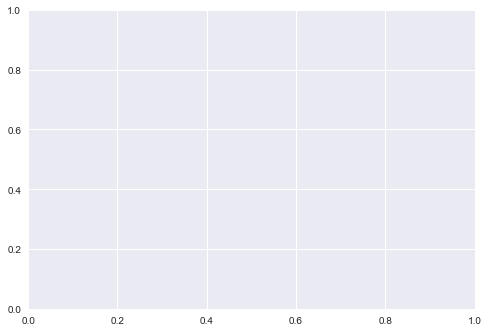

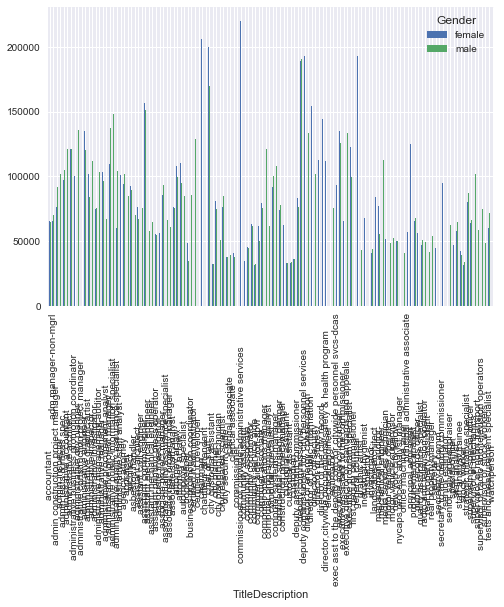

In [164]:
t.plot(kind='bar')
plt.show()

In [163]:
t = df.pivot_table(index='TitleDescription', columns='Gender', values='BaseSalary', aggfunc='median')
t

Gender,female,male
TitleDescription,,
accountant,65668.0,64864.0
adm manager-non-mgrl,65992.0,70129.0
admin construction project manager,76125.0,91639.0
admin inspector,NaN,102145.5
admin tests & meas spec,97308.0,105246.5
administrative accountant,NaN,121500.0
administrative architect,121164.5,121078.0
administrative business promotion coordinator,100000.0,110156.0
administrative city planner,NaN,135798.5


#This dataframe has multiple leave types.  We are only interested in employees with current status as 'Active' of this dataset dowload. I will remove those 750 employees with a LeaveStatusasofJune30 that are marked 'CEASED', 'ON LEAVE', and 'ON SEPARATION LEAVE'.

In [41]:
df.groupby(['LeaveStatusasofJune30']).count()

,ID,FiscalYear,AgencyName,AgencyStartDate,WorkLocationBorough,TitleDescription,BaseSalary,PayBasis,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay,Gender
LeaveStatusasofJune30,,,,,,,,,,,,,,
ACTIVE,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203
CEASED,648,648,648,648,648,648,648,648,648,648,648,648,648,648
ON LEAVE,65,65,65,65,65,65,65,65,65,65,65,65,65,65
ON SEPARATION LEAVE,37,37,37,37,37,37,37,37,37,37,37,37,37,37


In [44]:
df=df[df.LeaveStatusasofJune30 != 'CEASED']

In [46]:
df=df[df.LeaveStatusasofJune30 != 'ON LEAVE']

In [47]:
df=df[df.LeaveStatusasofJune30 != 'ON SEPARATION LEAVE']

In [48]:
df.groupby(['LeaveStatusasofJune30']).count()

,ID,FiscalYear,AgencyName,AgencyStartDate,WorkLocationBorough,TitleDescription,BaseSalary,PayBasis,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay,Gender
LeaveStatusasofJune30,,,,,,,,,,,,,,
ACTIVE,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203,4203


In [49]:
df.describe()

,ID,FiscalYear,BaseSalary,RegularHours,RegularGrossPaid,OTHours,TotalOTPaid,TotalOtherPay
count,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000
mean,2876.820604,2016.044016,59779.912919,1795.897454,55300.907685,188.191054,5738.779681,1756.960266
std,1681.057997,0.812629,31838.511527,413.746411,33252.638545,292.672772,8994.345263,2142.104009
min,8.000000,2015.000000,25997.000000,-38.000000,0.000000,0.000000,0.000000,-33.000000
25%,1432.000000,2015.000000,34364.000000,1825.000000,34027.000000,0.000000,0.000000,34.500000
50%,2834.000000,2016.000000,49682.000000,1830.000000,45441.000000,36.000000,1157.000000,1000.000000
75%,4308.000000,2017.000000,75258.000000,2086.000000,70580.000000,269.500000,8122.500000,2668.000000
max,5863.000000,2017.000000,226366.000000,2166.000000,232934.000000,1850.000000,55437.000000,18628.000000


In [50]:
#In reviewing median base salary by gender, it appears that women are still paid more than men.
df.groupby(['Gender'])[["BaseSalary"]].median()

,BaseSalary
Gender,
female,51613
male,47688


Help from data viz site https://www.kaggle.com/sohailkhan/pandas-plotting-and-visualization

In [52]:
# I will be using the TitleDescription feature so I need to fix the representation a bit
df['TitleDescription'] = df.TitleDescription.str.lower() 

# get the top ten occupations
top_ten_titles = df.TitleDescription.value_counts().sort_values(ascending=False).head(10).index
top_ten_titles

Index([u'city custodial assistant                                    ',
       u'custodian                                                   ',
       u'custodial assistant                                    ',
       u'administrative staff analyst                                ',
       u'principal administrative associate',
       u'clerical associate                          ',
       u'community associate                                         ',
       u'chauffeur-attendant                                         ',
       u'associate staff analyst                                     ',
       u'computer specialist                                         '],
      dtype='object')

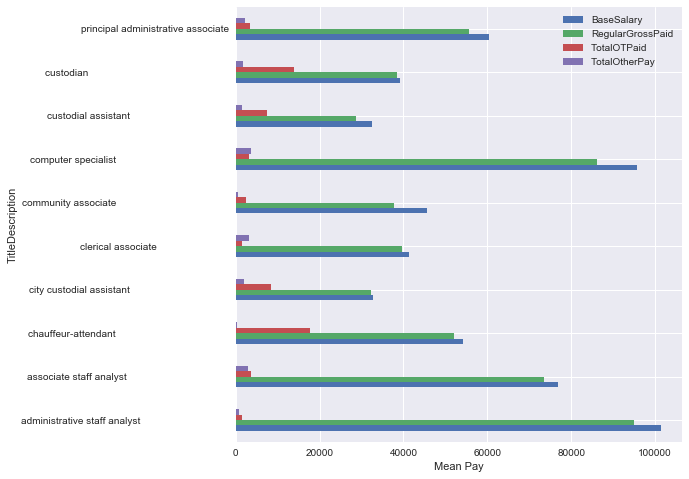

In [53]:
#Aggregate by title description and pick out the BaseSalary, Benefits, and Overtime features
pay_avg_by_title = (df[df.TitleDescription.isin(top_ten_titles)]
                                   .groupby('TitleDescription')[['BaseSalary', 'RegularGrossPaid', 'TotalOTPaid', 'TotalOtherPay']]
                                   .aggregate('mean')
)

ax = pay_avg_by_title.plot(kind='barh', figsize=(8,8))

ax.set_xlabel('Mean Pay')
plt.show()

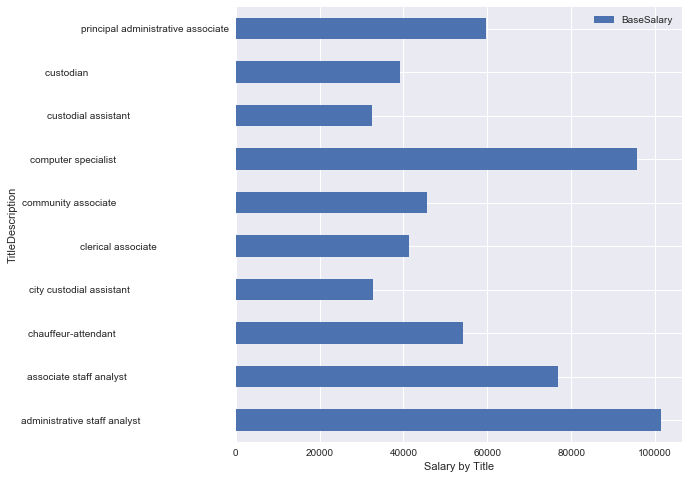

In [127]:
#Aggregate by title description and pick out the BaseSalary, Benefits, and Overtime features
pay_avg_by_title = (df[df.TitleDescription.isin(top_ten_titles)]
                                   .groupby('TitleDescription')[['BaseSalary']]
                                   .aggregate('mean')
)

ax = pay_avg_by_title.plot(kind='barh', figsize=(8,8))

ax.set_xlabel('Salary by Title')
plt.show()

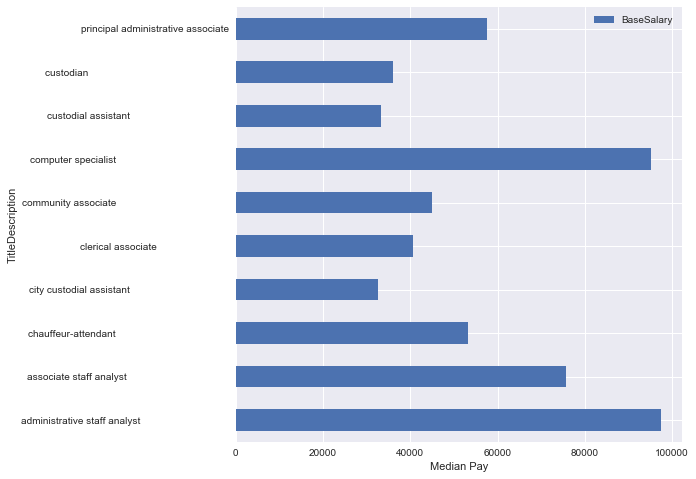

In [133]:
#Aggregate by title description and pick out the BaseSalary, Benefits, and Overtime features
pay_avg_by_title = (df[df.TitleDescription.isin(top_ten_titles)]
                                   .groupby('TitleDescription')[['BaseSalary']]
                                   .aggregate('median')
)

ax = pay_avg_by_title.plot(kind='barh', figsize=(8,8))

ax.set_xlabel('Median Pay')
plt.show()

In [58]:
# i will be using the JobTitle feature so I need to fix the representation a bit
df['Gender'] = df.Gender.str.lower() 

# get the top ten occupations
gender = df.Gender.value_counts().sort_values(ascending=False).head(2).index
gender

Index([u'male', u'female'], dtype='object')

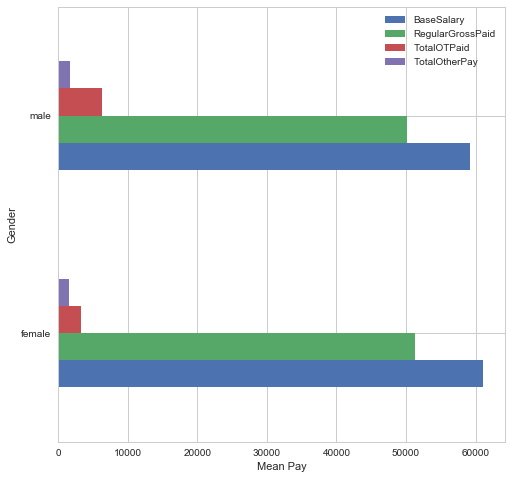

In [96]:
#Aggregate by job title and pick out the BaseSalary, Regular, and Overtime pay
salaries_gender = (df[df.Gender.isin(gender)]
                                   .groupby('Gender')[['BaseSalary', 'RegularGrossPaid', 'TotalOTPaid', 'TotalOtherPay']]
                                   .aggregate('mean')
)

ax = salaries_gender.plot(kind='barh', figsize=(8,8))

ax.set_xlabel('Mean Pay')
plt.show()

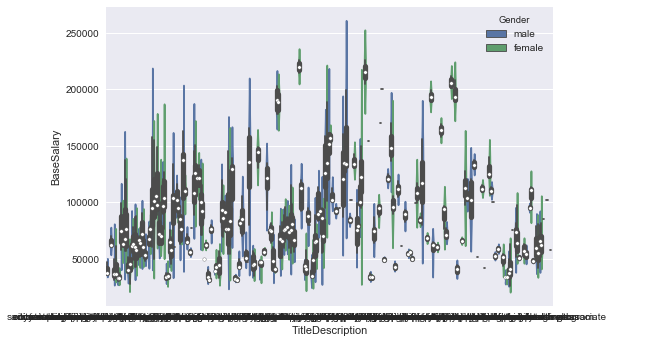

In [64]:
sns.violinplot(x="TitleDescription", y="BaseSalary", hue="Gender", data=df);
plt.show()

In [142]:
top = (df[df.TitleDescription.isin(top_ten_titles)])

/Applications/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


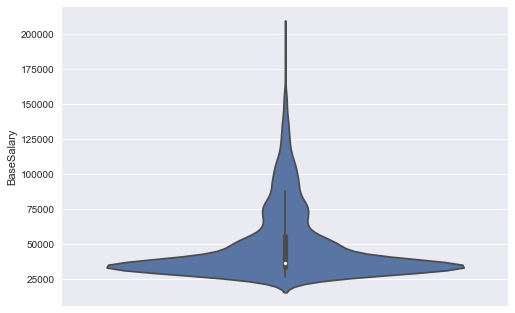

In [144]:
sns.violinplot(x=top, y="BaseSalary", hue="Gender", data=df);
plt.show()

In [ ]:
sns.violinplot(x=top, y="BaseSalary", hue="Gender", data=df);
plt.show()

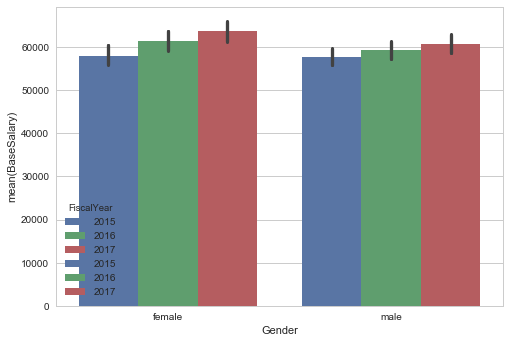

In [109]:
sns.barplot(x="Gender", y="BaseSalary", hue="FiscalYear", data=df);
plt.show()

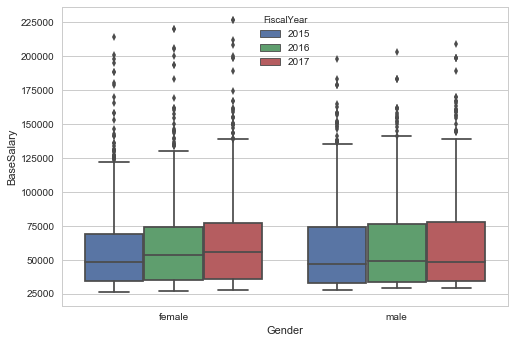

In [110]:
sns.boxplot(x="Gender", y="BaseSalary", hue="FiscalYear", data=df);
plt.show()

In [122]:
def scatterplot(x='Gender', y='BaseSalary', x_label="Gender", y_label="Salary", title="BaseSalary by Gender", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x=, y='BaseSalary', s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)

    plt.show()